In [26]:
#pip install matplotlib seaborn

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv("tracks_1d.csv")
data = data.drop(columns=['Posicion', 'usuario'])
data = data.drop_duplicates()


Configuración de estilo de seaborns

In [29]:
sns.set(style="whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

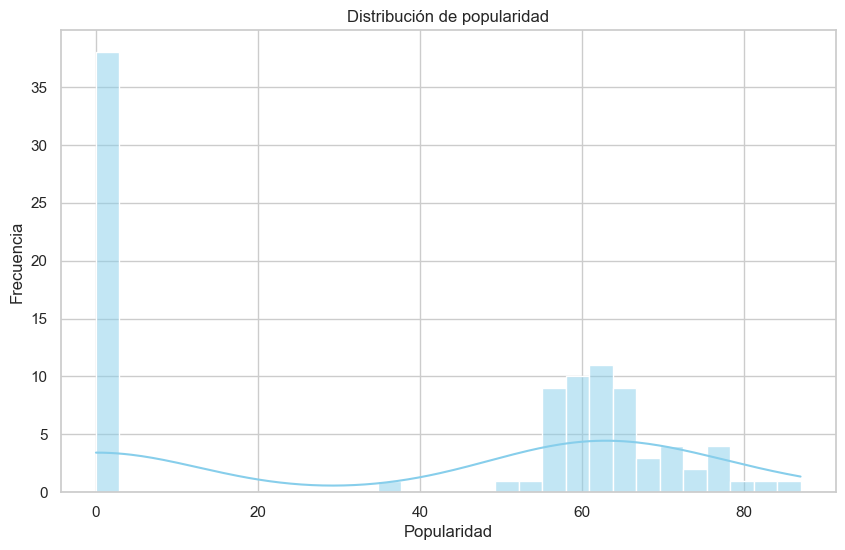

In [30]:
plt.figure(figsize=(10,6)) #tamaño
sns.histplot(data['Popularidad'], kde=True, bins= 30, color= 'skyblue') #tipo de grafica
plt.title("Distribución de popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.show

INSIGH DINAMICOS

TOP 3 CANCIONES CON MAYOR POPULARIDAD

In [31]:
top3 = data.sort_values(by = "Popularidad", ascending=False)

top3= top3.head(3)

<function matplotlib.pyplot.show(close=None, block=None)>

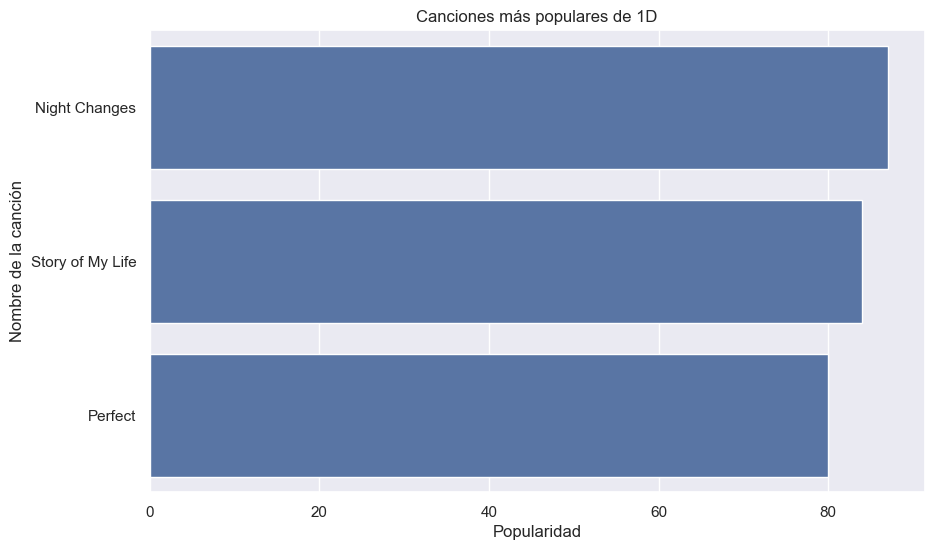

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6)) #tamaño
bar_plot = sns.barplot(x="Popularidad", y="Nombre_canción", data = top3)
plt.xlabel("Popularidad")
plt.ylabel("Nombre de la canción")
plt.title("Canciones más populares de 1D")

plt.show

TOP 3 ALBUMES

se agrupan por albunes y se saca un promedio de popularidad

In [42]:
album_map = {
    'Best Song Ever (From THIS IS US)': 'Midnight Memories (Deluxe)',
    'Live While We\'re Young': 'Take Me Home',
    'Take Me Home (Expanded Edition)': 'Take Me Home',
    'Take Me Home: Yearbook Edition': 'Take Me Home',
    'Night Changes': 'FOUR (Deluxe)',
    'Perfect - EP':'Made In The A.M. (Deluxe Edition)',
    'Steal My Girl (Acoustic Version)':'FOUR (Deluxe)',
    'You & I':'Midnight Memories (Deluxe)'
}
data['Nombre_album'] = data['Nombre_album'].apply(lambda x: album_map.get(x, x))

albumtop = data.groupby('Nombre_album')['Popularidad'].mean().reset_index()
albumtop = albumtop.rename(columns={'Popularidad': 'Popularidad_mean'})
albumtop = albumtop[albumtop['Nombre_album'] != 'One Way Or Another (Teenage Kicks)']

albumtop3 = albumtop.sort_values(by = "Popularidad_mean", ascending=False)
albumtop3= albumtop3.head(3)


<function matplotlib.pyplot.show(close=None, block=None)>

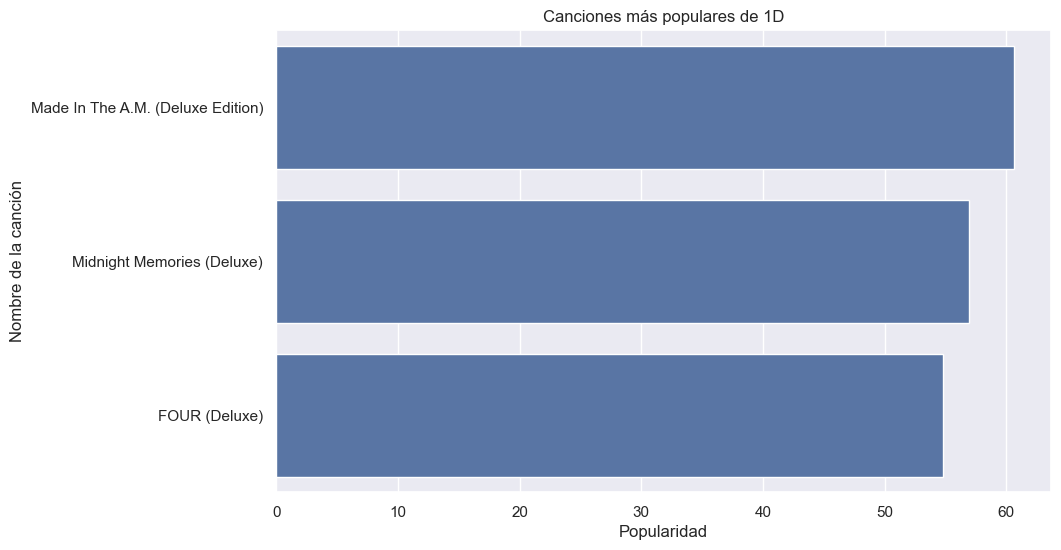

In [43]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6)) #tamaño
bar_plot = sns.barplot(x="Popularidad_mean", y="Nombre_album", data = albumtop3)
plt.xlabel("Popularidad")
plt.ylabel("Nombre de la canción")
plt.title("Canciones más populares de 1D")

plt.show

CANCIONES MAS POPULARES POR ALBUM

In [45]:
topcancionalbun = pd.merge(data, albumtop, how='left', on='Nombre_album')
topcancionalbun

,Nombre_canción,Nombre_album,Popularidad,Nombre_artista,Popularidad_mean
0,Hey Angel,Made In The A.M. (Deluxe Edition),60,One Direction,60.666667
1,Drag Me Down,Made In The A.M. (Deluxe Edition),77,One Direction,60.666667
2,Infinity,Made In The A.M. (Deluxe Edition),64,One Direction,60.666667
3,End of the Day,Made In The A.M. (Deluxe Edition),61,One Direction,60.666667
4,If I Could Fly,Made In The A.M. (Deluxe Edition),64,One Direction,60.666667
...,...,...,...,...,...
91,Another World,Up All Night,52,One Direction,9.277778
92,I Should Have Kissed You,Up All Night,57,One Direction,9.277778
93,Perfect,Made In The A.M. (Deluxe Edition),80,One Direction,60.666667
94,Live While We're Young,Take Me Home,72,One Direction,7.631579
